In [6]:
import pandas as pd
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import seaborn as sn


plt.style.use('ggplot')

In [7]:
##https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
data = pd.read_csv("diabetes_data.csv") 

In [8]:
label_1 = LabelEncoder()
for col in data.columns:
    if col!="Age":
        data[col] = label_1.fit_transform(data[col])

In [9]:
X=data[data.keys()[:-1]]
Y=data['class']

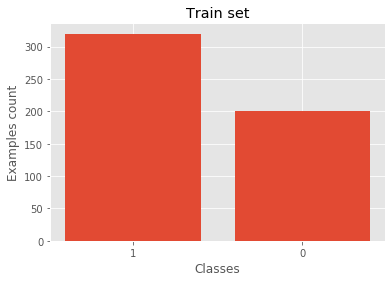

In [10]:
values = Y.value_counts()

plt.bar(["1","0"], values)
plt.title('Train set')
plt.xlabel('Classes')
plt.ylabel('Examples count')
plt.show()

In [11]:
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, np.newaxis]).toarray()

n_features = X.shape[1]
n_classes = Y.shape[1]

In [12]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.4)

In [13]:
X_train.shape

(364, 16)

In [14]:
X_test.shape

(93, 16)

In [15]:
X_val.shape

(63, 16)

In [16]:
def create_model(name,hidden_layer,opt): 
    model=Sequential(name=name)
    model.add(Dense(10, input_dim=n_features, activation='relu'))
    for i in range(hidden_layer):
        model.add(Dense(8, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', 
                          optimizer=opt, 
                          metrics=['accuracy'])
    return model

In [17]:
def calistir(name,hidden_layer,opt):
    
    model=create_model(name,hidden_layer,opt)
    
    history_callback =model.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=0,
                                validation_data=(X_val, Y_val))
    
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return history_callback , model

In [18]:
def plot_history(history,model_name): #bir modelin accuracy ve loss metriklerini görselleştirme
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])


    #ax1.set_title('title')
    ax1.set_ylabel('accuracy')
    ax1.legend(['train', 'val'], loc='upper left')

    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax1.legend(['train', 'val'], loc='upper left')
    plt.savefig('images/'+model_name+'_los_acc')
    plt.show()

In [19]:
def plt_cm(y, y_pred,name):
    cm =confusion_matrix(y, y_pred)
    sn.heatmap(cm,annot=True,fmt='g',lw=2)
    plt.ylabel("True Values")
    plt.xlabel("PredictedValues")
    plt.title("Confusion Matrix")
    plt.savefig('images/'+name+'_confusion_matrix')
    plt.show()

In [39]:
def plt_roc(y, y_pred, name):
    fpr, tpr, threshold= metrics.roc_curve(y, y_pred)
    roc_auc=metrics.auc(fpr,tpr)

    plt.title('Roc')
    plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig('images/'+name+'_roc_curve')
    plt.show()

In [21]:
epochs=100
batch_size=12

y_test = np.argmax(Y_test, axis = 1)
opt = keras.optimizers.Adam(learning_rate=0.01)

### Deney_1) 0 hidden layer, 0.01 learning rate

Test loss: 0.1165620111009126
Test accuracy: 0.9784946441650391


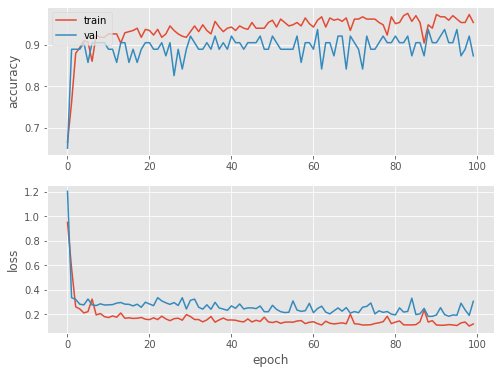

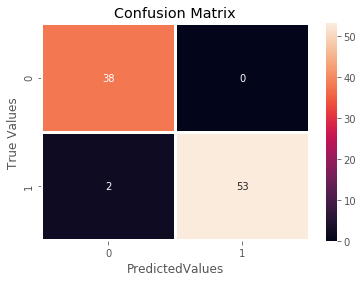

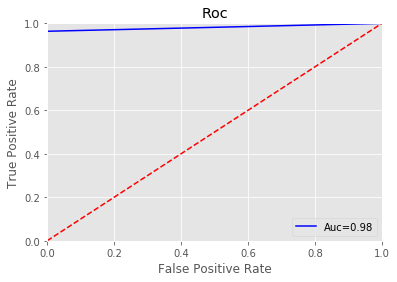

In [25]:
name='model_1'
hidden_layer=0

history_1 ,model_1 = calistir(name,hidden_layer,opt) 
y1_pred = model_1.predict(X_test)
y1_pred = np.argmax(y1_pred, axis = 1)

plot_history(history_1,name)
plt_cm(y_test,y1_pred,name)
plt_roc(y_test,y1_pred,name)

### Deney_2) 2 hidden layer, 0.01 learning rate 

Test loss: 0.07697319343525877
Test accuracy: 0.9892473220825195


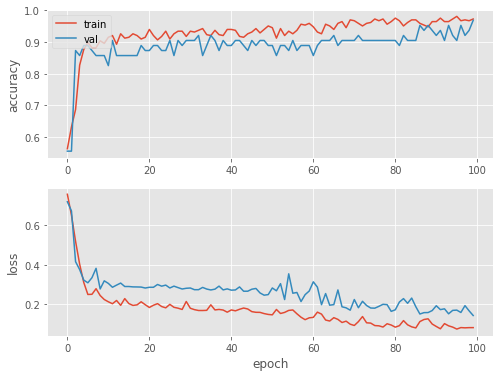

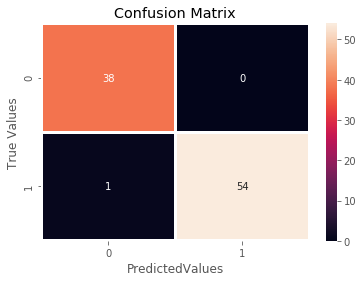

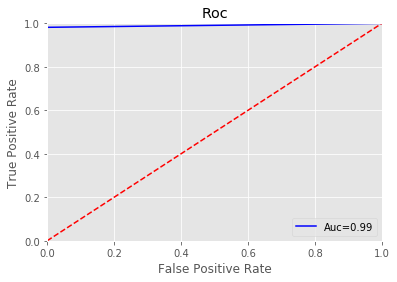

In [35]:
name='model_2'
hidden_layer=2

history_2 ,model_2 = calistir(name,hidden_layer,opt) 

y2_pred = model_2.predict(X_test)
y2_pred = np.argmax(y2_pred, axis = 1)

plot_history(history_2,name)
plt_cm(y_test,y2_pred,name)
plt_roc(y_test,y2_pred,name)

### Deney_3) 6 hidden layer, 0.01 learning rate 

Test loss: 0.14808621810328576
Test accuracy: 0.9569892287254333


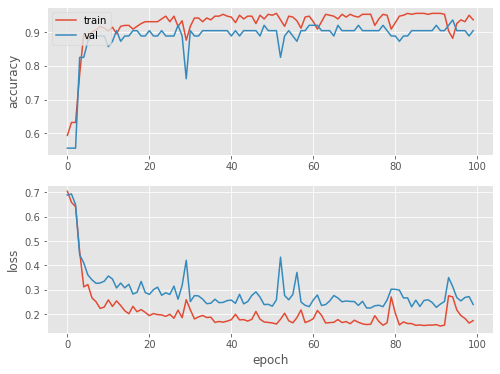

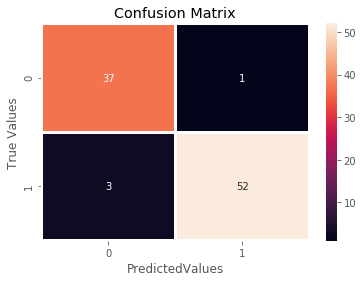

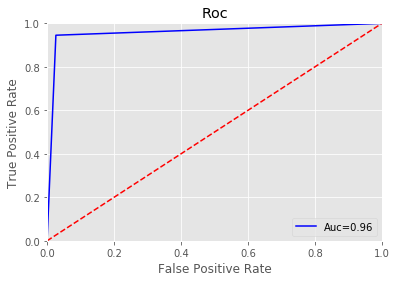

In [45]:
name='model_3'
hidden_layer=6

history_3 , model_3 = calistir(name,hidden_layer,opt) 
plot_history(history_3,name)

y3_pred = model_3.predict(X_test)
y3_pred = np.argmax(y3_pred, axis = 1)

plt_cm(y_test,y3_pred, name)
plt_roc(y_test,y3_pred, name)

In [46]:
hidden_layer=6

### Deney_4) 0.05 learning rate 6 hidden layer 

Test loss: 0.6867094001462383
Test accuracy: 0.5913978219032288


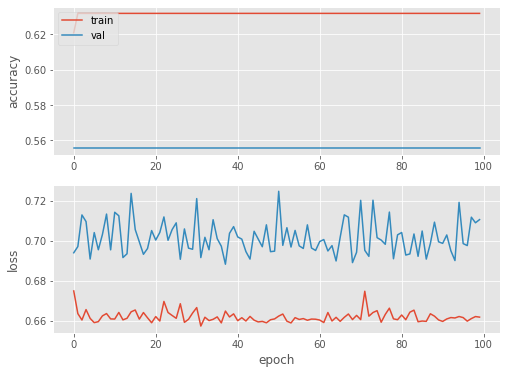

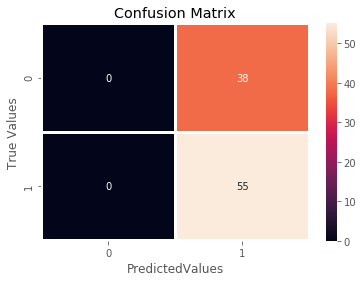

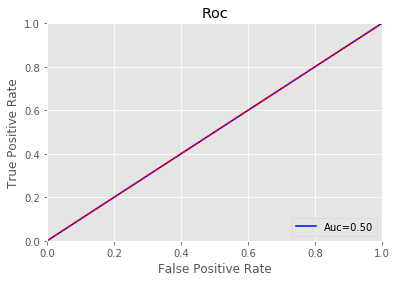

In [47]:
name='model_4'
opt = keras.optimizers.Adam(learning_rate=0.05)

history_4 ,model_4 = calistir(name,hidden_layer,opt) 

y4_pred = model_4.predict(X_test)
y4_pred = np.argmax(y4_pred, axis = 1)

plot_history(history_4,name)
plt_cm(y_test,y4_pred,name)
plt_roc(y_test,y4_pred,name)

### Deney_5) 0.001 learning rate, 6 hidden layer

Test loss: 0.10945831800019869
Test accuracy: 0.9784946441650391


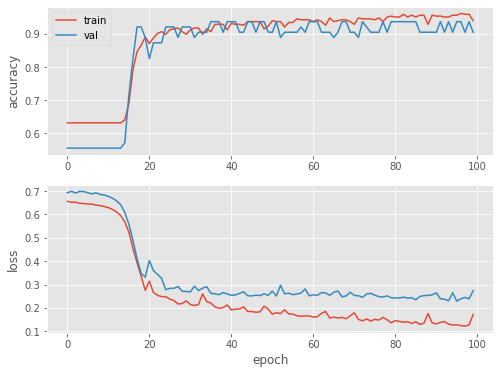

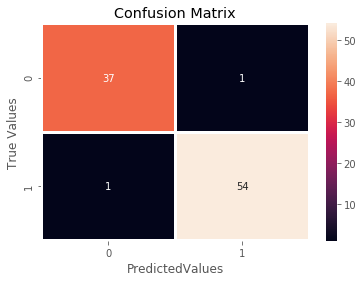

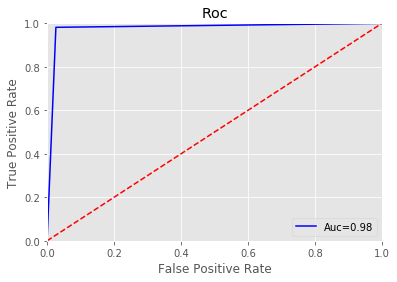

In [48]:
name='model_5'
opt = keras.optimizers.Adam(learning_rate=0.001)

history_5, model_5= calistir(name,hidden_layer,opt) 

y5_pred = model_5.predict(X_test)
y5_pred = np.argmax(y5_pred, axis = 1)

plot_history(history_5,name)
plt_cm(y_test,y5_pred,name)
plt_roc(y_test,y5_pred,name)

### Deney_6) 0.0001 learning rate 6 hidden layer

Test loss: 0.30778753725431296
Test accuracy: 0.9139785170555115


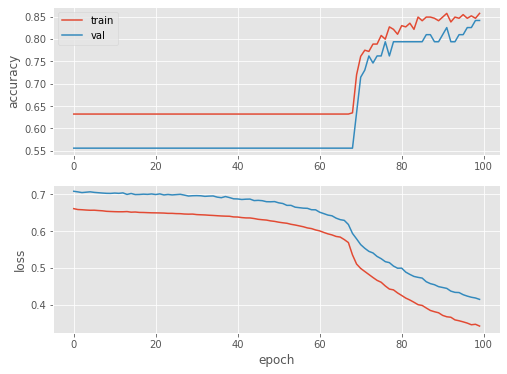

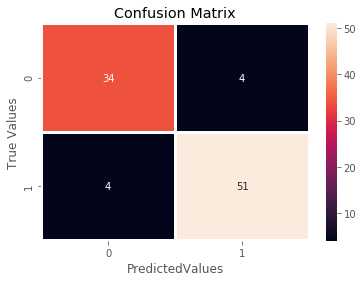

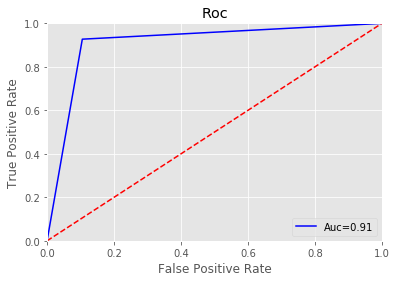

In [49]:
name='model_6'
opt = keras.optimizers.Adam(learning_rate=0.0001)

history_6 ,model_6= calistir(name,hidden_layer,opt) 

y6_pred = model_6.predict(X_test)
y6_pred = np.argmax(y6_pred, axis = 1)

plot_history(history_6,name)
plt_cm(y_test,y6_pred,name)
plt_roc(y_test,y6_pred,name)